# Assignment 2

**Student Name**: Oak Soe Kyaw

**Student ID**: ST125064


# Importing Libraries


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings


warnings.filterwarnings('ignore')

# Loading Dataset


In [46]:
df = pd.read_csv('./data/Predicting Car Prices.csv')

In [47]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [48]:
df.shape

(8128, 13)

In [49]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [51]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# Data Set Cleaning


In [52]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

For the feature owner, map First owner to 1, ..., Test Drive Car to 5


In [53]:
#mapping the owner column
owner_map={
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5,
}

df['owner'] = df['owner'].map(owner_map)
df["owner"].unique()

array([1, 2, 3, 4, 5])

For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol


In [54]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [55]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [56]:
#removing rows of fuel with CNG LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).


In [57]:
print(df['mileage'].head())

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object


In [58]:
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [59]:
print(df['mileage'].head())

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64


For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)


In [60]:
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
df['engine'].unique()

array([1248., 1498., 1497., 1396., 1298., 1197.,  796., 1364., 1399.,
       1461.,  993.,   nan, 1061., 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

Do the same for Max_Power.


In [61]:
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)
df['max_power'].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  37.   ,
        67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,  67.   ,
        82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
       121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,  67.05 ,
       168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 , 171.5  ,
       100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,  86.8  ,
       108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,  67.04 ,
        68.05 ,  82.85 ,  81.8  ,  73.   , 120.   ,  94.68 , 160.   ,
        65.   , 155.   ,  69.01 , 126.32 , 138.1  ,  83.8  , 126.2  ,
        98.96 ,  62.1  ,  86.7  , 188.   , 214.56 , 177.   , 280.   ,
       148.31 , 254.79 , 190.   , 177.46 , 204.   , 141.   , 117.6  ,
       241.4  , 282.   , 150.   , 147.5  , 108.5  , 103.5  , 183.   ,
       181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,  68.   ,  75.   ,
        85.8  ,  87.

For the feature brand, take only the first word and remove the rest


In [62]:
df['name']=df['name'].str.split(' ').str[0]
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

Drop the feature torque, simply because Chaky’s company does not understand well about it


In [63]:
df=df.drop(columns=['torque'])

In [64]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [65]:
df = df[df['owner'] != 5]


Selling Price Log Transfomations


In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [67]:
# Apply log transformation to the selling price
df['selling_price'] = np.log(df['selling_price'])

In [68]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Encoding Labels


In [69]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['name']=le.fit_transform(df['name']) 
df['fuel']=le.fit_transform(df['fuel']) 
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission']) 

In [70]:
df['name'].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

# Plot Testings


<Axes: xlabel='selling_price', ylabel='count'>

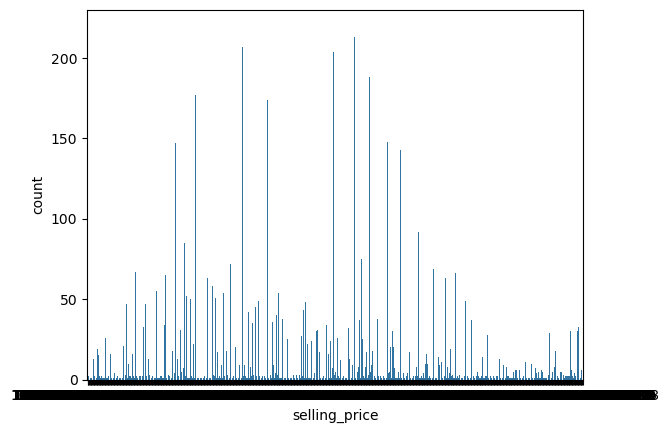

In [71]:
sns.countplot(data=df, x='selling_price')

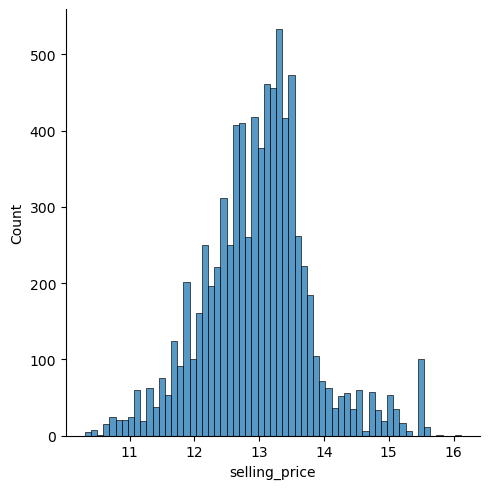

In [72]:
sns.displot(data = df, x = 'selling_price')

# Feature Selections

Choosing features


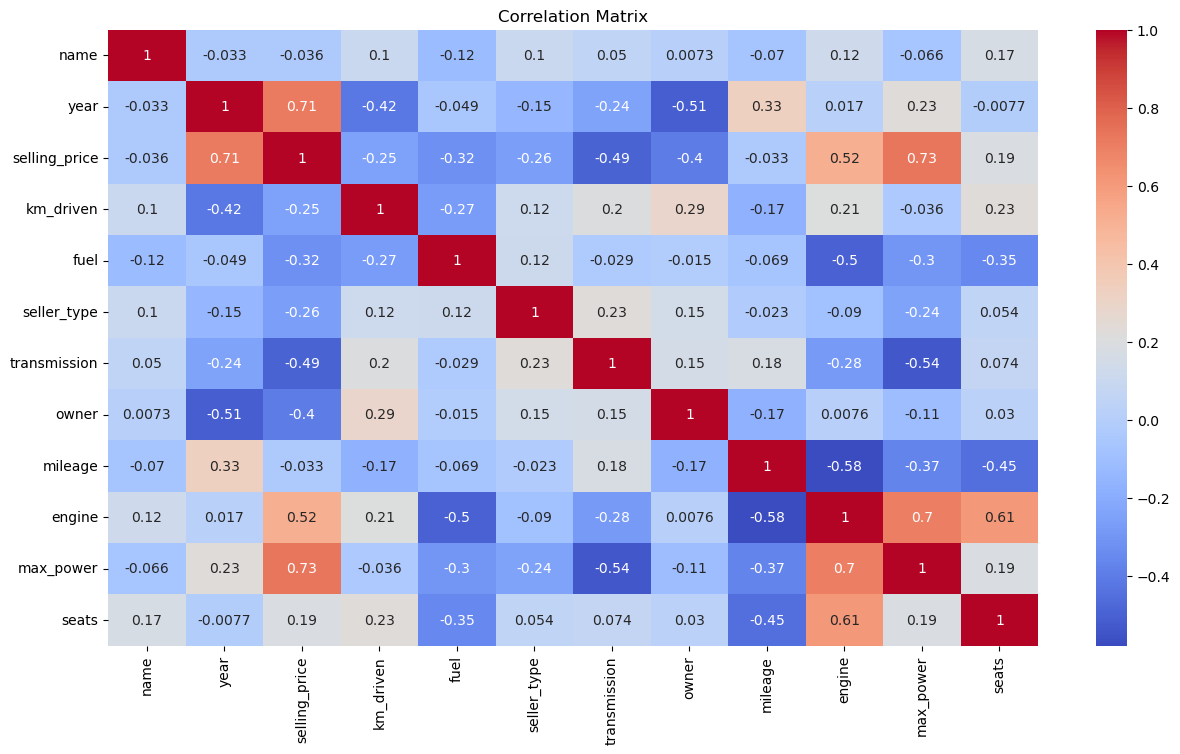

In [73]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Show plot
plt.title("Correlation Matrix")
plt.show()

Selecting Features


In [74]:
#features-selection
selected_features = ['year', 'max_power', 'engine', 'owner', 'fuel','transmission']
X = df[selected_features]
y = df['selling_price']


Model Splitting


In [75]:
#Model Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Checking null values


In [76]:
X_train[['year','max_power','engine','owner','fuel','transmission']].isna().sum()

year              0
max_power       149
engine          154
owner             0
fuel              0
transmission      0
dtype: int64

In [77]:
X_test[['year','max_power','engine','owner','fuel','transmission']].isna().sum()

year             0
max_power       59
engine          60
owner            0
fuel             0
transmission     0
dtype: int64

In [78]:
y_train.isna().sum()

np.int64(0)

In [79]:
y_test.isna().sum()

np.int64(0)

Filling Missing Values


In [80]:
#For training set
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

# For testing set
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)

In [81]:
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

Checking Missing Values again


In [82]:
X_train[['engine', 'max_power']].isna().sum()

engine       0
max_power    0
dtype: int64

In [83]:
X_test[['engine', 'max_power']].isna().sum()

engine       0
max_power    0
dtype: int64

In [84]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

# Scaling


In [85]:
from sklearn.preprocessing import StandardScaler
import pickle

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully as 'scaler.pkl'")

Scaler saved successfully as 'scaler.pkl'


In [86]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 6)
Shape of X_test:  (2409, 6)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# Algorithm Implementations

## Linear Regression

In [87]:
from sklearn.model_selection import KFold

class LinearRegression:
    def __init__(self, regularization, lr=0.001, method='batch', num_epochs=50, batch_size=50,
                 cv=KFold(n_splits=3), init_method="zero", use_momentum=False, momentum=0.9):
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method  # 'sto', 'mini', or 'batch'
        self.cv = cv
        self.regularization = regularization
        self.init_method = init_method  # "zero" or "xavier"
        self.use_momentum = use_momentum
        self.momentum = momentum
        self.prev_step = 0  # for momentum
        self.kfold_scores = []  # to store cv results

    def initialize_weights(self, n_features):
        if self.init_method == "zero":
            return np.zeros(n_features)
        elif self.init_method == "xavier":
            lower, upper = -(1.0/np.sqrt(n_features)), (1.0/np.sqrt(n_features))
            return np.random.uniform(lower, upper, size=n_features)
        else:
            raise ValueError("Invalid initialization method.")

    def mse(self, y_true, y_pred):
        y_true = np.array(y_true).reshape(-1)
        y_pred = np.array(y_pred).reshape(-1)
        return np.mean((y_pred - y_true)**2)

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def predict(self, X):
        return X @ self.theta

    def _train(self, X, y):
        # Compute prediction and gradient
        yhat = self.predict(X)
        m = X.shape[0]
        grad = (1/m) * (X.T @ (yhat - y))
        if self.regularization:
            grad += self.regularization.derivation(self.theta)
        # Update with learning rate and (optional) momentum
        step = self.lr * grad
        if self.use_momentum:
            step += self.momentum * self.prev_step
            self.prev_step = step
        self.theta = self.theta - step
        return self.mse(y, yhat)

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        self.kfold_scores = []  # reset cv scores

        # Cross-validation loop
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cv_train, y_cv_train = X_train[train_idx], y_train[train_idx]
            X_cv_val, y_cv_val = X_train[val_idx], y_train[val_idx]

            # Reset previous momentum and early-stopping tracking per fold
            self.prev_step = 0
            self.val_loss_old = np.inf

            # Initialize weights for this fold
            self.theta = self.initialize_weights(X_cv_train.shape[1])

            # For logging per-fold, you could also start a nested mlflow run if desired.
            for epoch in range(self.num_epochs):
                # Shuffle (make sure to shuffle both X and y together)
                perm = np.random.permutation(X_cv_train.shape[0])
                X_cv_train = X_cv_train[perm]
                y_cv_train = y_cv_train[perm]

                # Choose gradient descent method
                if self.method == 'sto':
                    # Stochastic: update for each sample
                    for i in range(X_cv_train.shape[0]):
                        X_batch = X_cv_train[i].reshape(1, -1)
                        y_batch = np.array([y_cv_train[i]])
                        train_loss = self._train(X_batch, y_batch)
                elif self.method == 'mini':
                    # Mini-batch: update in batches of self.batch_size
                    for i in range(0, X_cv_train.shape[0], self.batch_size):
                        X_batch = X_cv_train[i:i+self.batch_size]
                        y_batch = y_cv_train[i:i+self.batch_size]
                        train_loss = self._train(X_batch, y_batch)
                else:
                    # Batch: update once per epoch using all training data
                    train_loss = self._train(X_cv_train, y_cv_train)

                # Validate on the fold's validation set
                y_val_pred = self.predict(X_cv_val)
                val_loss = self.mse(y_cv_val, y_val_pred)
                # Early stopping if validation loss is not changing significantly
                if np.allclose(val_loss, self.val_loss_old, atol=1e-6):
                    break
                self.val_loss_old = val_loss

            self.kfold_scores.append({
                "mse": val_loss,
                "r2": self.r2_score(y_cv_val, self.predict(X_cv_val))
            })

    def plot_feature_importance(self, feature_names):
        if len(self.theta) != len(feature_names):
            raise ValueError("Feature names must match the number of coefficients.")
        # Skip bias term if present (assumes first coefficient is bias)
        coef = self.theta.copy()
        if len(coef) == len(feature_names) + 1:
            coef = coef[1:]
        # Get absolute importance and sort indices
        abs_coef = np.abs(coef)
        sorted_idx = np.argsort(abs_coef)[::-1]
        plt.figure(figsize=(10, 5))
        plt.barh([feature_names[i] for i in sorted_idx], abs_coef[sorted_idx], color='blue')
        plt.xlabel("Absolute Coefficient Value")
        plt.ylabel("Feature")
        plt.title("Feature Importance")
        plt.gca().invert_yaxis()
        plt.show()

### Lasso, Ridge, & Normal Penalty


In [88]:
# Penalty class
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class NormalPenalty:
    """No regularization (default linear regression)."""
    def derivation(self, theta):
        return 0  # No penalty

# Penalty functions
      
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method)

class Normal(LinearRegression):
    """Standard Linear Regression without L1/L2 penalty."""
    def __init__(self, method, lr):
        self.regularization = NormalPenalty()
        super().__init__(self.regularization, lr, method)


# Training Data


In [89]:
import numpy as np
import pandas as pd
import mlflow
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

# --- Hyperparameter Grid ---
regularization_options = {
    "Polynomial": {"degree": 2},  # special handling below
    "Lasso": LassoPenalty(0.1),
    "Ridge": RidgePenalty(0.1),
    "Normal": None  # No regularization
}
momentum_options = [True, False]
gd_methods = ['sto', 'mini', 'batch']
init_methods = ['zero', 'xavier']
learning_rates = [0.01, 0.001, 0.0001]

# --- Setup MLflow ---
mlflow.set_tracking_uri("http://localhost:5001")
mlflow.set_experiment("Car Price Prediction Experiment")


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Initialize Tracking Variables ---
results = []
best_model = None
best_cv_r2 = -np.inf
best_config = None
best_poly = None 

# --- Grid Search ---
for reg_name, reg_val in regularization_options.items():
    for lr in learning_rates:
        for method in gd_methods:
            for use_mom in momentum_options:
                for init_method in init_methods:
                    run_name = f"{reg_name}_lr_{lr}_{method}_mom_{use_mom}_init_{init_method}"
                    with mlflow.start_run(run_name=run_name):
                        # If using Polynomial features, transform the training data.
                        if reg_name == "Polynomial":
                            degree = regularization_options[reg_name]["degree"]
                            poly = PolynomialFeatures(degree=degree)
                            X_train_trans = poly.fit_transform(X_train_scaled)
                            mlflow.log_param("Degree", degree)
                        else:
                            X_train_trans = X_train_scaled
                        
                        # Log hyperparameters.
                        mlflow.log_param("Regularization", reg_name)
                        mlflow.log_param("Learning_Rate", lr)
                        mlflow.log_param("GD_Method", method)
                        mlflow.log_param("Use_Momentum", use_mom)
                        mlflow.log_param("Initialization", init_method)
                        
                        # For Polynomial, we don't apply an explicit regularization penalty.
                        reg_obj = reg_val if reg_name != "Polynomial" else None
                        
                        # Instantiate your LinearRegression model with the current hyperparameters.
                        model = LinearRegression(
                            regularization=reg_obj,
                            lr=lr,
                            method=method,
                            num_epochs=50,
                            batch_size=50,
                            cv=kf,
                            init_method=init_method,
                            use_momentum=use_mom,
                            momentum=0.9
                        )
                        
                        # Fit the model on the (possibly transformed) training data.
                        model.fit(X_train_trans, y_train)
                        
                        # Loop over each fold and log its metrics.
                        for fold_index, fold_score in enumerate(model.kfold_scores):
                            print(f"Run {run_name} - Fold {fold_index}: MSE = {fold_score['mse']:.4f}, R2 = {fold_score['r2']:.4f}")
                            mlflow.log_metric(f"Fold_{fold_index}_MSE", fold_score['mse'])
                            mlflow.log_metric(f"Fold_{fold_index}_R2", fold_score['r2'])
                        
                        # Compute average CV metrics.
                        avg_mse = np.mean([fold["mse"] for fold in model.kfold_scores])
                        avg_r2  = np.mean([fold["r2"] for fold in model.kfold_scores])
                        mlflow.log_metric("CV_MSE", avg_mse)
                        mlflow.log_metric("CV_R2", avg_r2)
                        
                        # Print final average CV metrics.
                        print(f"Run {run_name} - Average CV MSE: {avg_mse:.4f}, Average CV R2: {avg_r2:.4f}")
                        
                        # Save current configuration results.
                        results.append({
                            "Regularization": reg_name,
                            "Learning_Rate": lr,
                            "GD_Method": method,
                            "Use_Momentum": use_mom,
                            "Initialization": init_method,
                            "Degree": degree if reg_name == "Polynomial" else None,
                            "CV_MSE": avg_mse,
                            "CV_R2": avg_r2
                        })
                        
                        # Track best model (by highest average CV R2).
                        if avg_r2 > best_cv_r2:
                            best_cv_r2 = avg_r2
                            best_model = model
                            best_config = results[-1]
                            if reg_name == "Polynomial":
                                best_poly = poly
                        print(f"Completed run: {run_name} => CV R2: {avg_r2:.4f}")

# --- Final Results ---
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="CV_R2", ascending=False).reset_index(drop=True)
print("Final Results:")
print(results_df)


Run Polynomial_lr_0.01_sto_mom_True_init_zero - Fold 0: MSE = inf, R2 = -inf
Run Polynomial_lr_0.01_sto_mom_True_init_zero - Fold 1: MSE = inf, R2 = -inf
Run Polynomial_lr_0.01_sto_mom_True_init_zero - Fold 2: MSE = inf, R2 = -inf
Run Polynomial_lr_0.01_sto_mom_True_init_zero - Fold 3: MSE = inf, R2 = -inf
Run Polynomial_lr_0.01_sto_mom_True_init_zero - Fold 4: MSE = inf, R2 = -inf
Run Polynomial_lr_0.01_sto_mom_True_init_zero - Average CV MSE: inf, Average CV R2: -inf
Completed run: Polynomial_lr_0.01_sto_mom_True_init_zero => CV R2: -inf
🏃 View run Polynomial_lr_0.01_sto_mom_True_init_zero at: http://localhost:5001/#/experiments/952159732461498036/runs/ba24faf2ec34430f9083fd850707f832
🧪 View experiment at: http://localhost:5001/#/experiments/952159732461498036
Run Polynomial_lr_0.01_sto_mom_True_init_xavier - Fold 0: MSE = inf, R2 = -inf
Run Polynomial_lr_0.01_sto_mom_True_init_xavier - Fold 1: MSE = inf, R2 = -inf
Run Polynomial_lr_0.01_sto_mom_True_init_xavier - Fold 2: MSE = inf, 

In [90]:
# Assuming best_config is a dictionary holding the best run's parameters and metrics
best_cv_mse = best_config["CV_MSE"]
best_cv_r2  = best_config["CV_R2"]

print("Best CV MSE:", best_cv_mse)
print("Best CV R2:", best_cv_r2)


Best CV MSE: 0.08656958932807753
Best CV R2: 0.8765351975465576


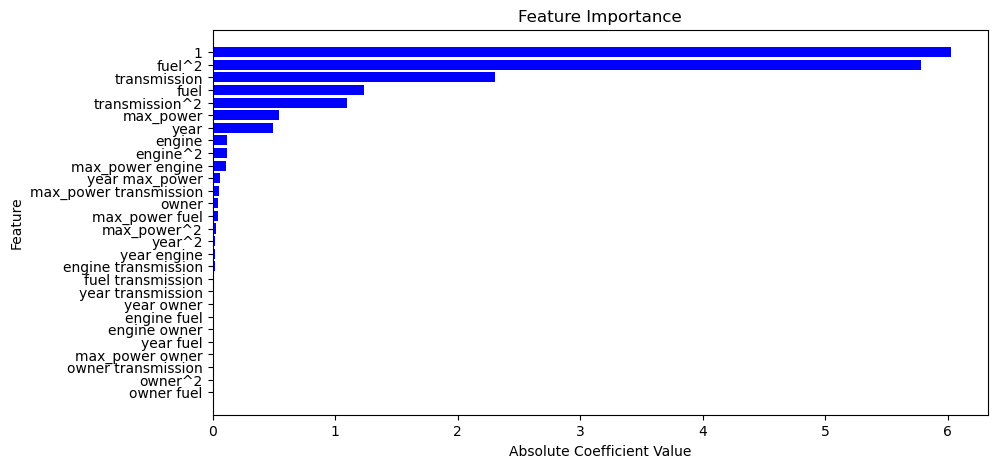

In [91]:
# If best_poly exists, use it to get the feature names corresponding to the polynomial features.
if best_poly is not None:
    # For scikit-learn v1.0+ use get_feature_names_out; if using an older version, use get_feature_names.
    poly_feature_names = best_poly.get_feature_names_out(selected_features)
    best_model.plot_feature_importance(poly_feature_names)
else:
    best_model.plot_feature_importance(selected_features)



## Best MSE & R2 score

In [92]:
# -------------------------------
# 5. Evaluate on Test Set with Best Model
# -------------------------------
# Use polynomial transformer if applicable (apply it on the scaled test data)
if best_config["Regularization"] == "Polynomial" and best_poly is not None:
    X_test_best = best_poly.transform(X_test_scaled)
else:
    X_test_best = X_test_scaled

y_test_pred = best_model.predict(X_test_best)
test_mse = best_model.mse(y_test, y_test_pred)
test_r2 = best_model.r2_score(y_test, y_test_pred)

print(f"\nBest Model Configuration: {best_config}")
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")

# Log test performance in a final MLflow run
with mlflow.start_run(run_name="Best Model Test Evaluation"):
    mlflow.log_params(best_config)
    mlflow.log_metric("Test_MSE", test_mse)
    mlflow.log_metric("Test_R2", test_r2)



Best Model Configuration: {'Regularization': 'Polynomial', 'Learning_Rate': 0.01, 'GD_Method': 'mini', 'Use_Momentum': False, 'Initialization': 'zero', 'Degree': 2, 'CV_MSE': np.float64(0.08656958932807753), 'CV_R2': np.float64(0.8765351975465576)}
Test MSE: 0.08720148256930516
Test R2: 0.8760615209243247
🏃 View run Best Model Test Evaluation at: http://localhost:5001/#/experiments/952159732461498036/runs/f7be743401864c4e873022117f85dd49
🧪 View experiment at: http://localhost:5001/#/experiments/952159732461498036


### Save model and polynomial features

In [93]:
import pickle

# Save the best model to disk.
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'.")

# Save the best polynomial transformer if it exists.
if best_poly is not None:
    with open("best_poly.pkl", "wb") as file:
        pickle.dump(best_poly, file)
    print("Best polynomial transformer saved as 'best_poly.pkl'.")


Best model saved as 'best_model.pkl'.
Best polynomial transformer saved as 'best_poly.pkl'.


# Inference

### Loading the model and features

In [94]:
import numpy as np
import pickle

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load the best model
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Load the best polynomial transformer if it was used.
try:
    with open('best_poly.pkl', 'rb') as file:
        best_poly = pickle.load(file)
except FileNotFoundError:
    best_poly = None

### Testing the predictions

In [95]:
# Define the sample input using the selected features.
# Order: ['year', 'max_power', 'engine', 'owner', 'fuel', 'transmission']
sample_input = np.array([[2015, 80, 1000, 2, 1, 1]])

# Preprocess the sample input: apply scaling first.
sample_input_scaled = scaler.transform(sample_input)

# If the best model uses polynomial features, transform the input.
if best_poly is not None:
    sample_input_trans = best_poly.transform(sample_input_scaled)
else:
    sample_input_trans = sample_input_scaled

# Run inference.
predicted_price = best_model.predict(sample_input_trans)
true_price=np.exp(predicted_price)
print("Predicted Selling Price for the sample input:", true_price)


Predicted Selling Price for the sample input: [380478.11017974]


In [96]:
sample_input_2 = np.array([[2018, 100, 1600, 1, 1, 1]])

sample_input_scaled_2 = scaler.transform(sample_input_2)
sample_input_transformed_2 = best_poly.transform(sample_input_scaled_2)

predicted_price_2 = best_model.predict(sample_input_transformed_2)
true_price_2 = np.exp(predicted_price_2)
print("Predicted Selling Price for the sample input:", true_price_2)


Predicted Selling Price for the sample input: [684849.0631596]


# Report

The experiment has been conducted in custom Linear Regression algorithm with the following methods:


- **Regularization Options:** Polynomial, Lasso, Ridge, and Normal (no regularization)
- **Momentum:** With and without momentum
- **Gradient Descent Methods:** Stochastic, mini-batch, and full-batch
- **Weight Initialization:** Zero and Xavier initialization
- **Learning Rates:** 0.01, 0.001, and 0.0001

MLflow was used to track all experiments, log hyperparameters and metrics, and compare model performance using cross-validation (CV) metrics (MSE and R²). 


From the results, it can be concluded that the best model is with the following parameters:

- **Regularization**: Polynomial
- **Leaarning Rate**: 0.01
- **Gradient Descent Method**: mini-batch
- **Use Momentum**: False
- **Initialization**: zero
- **Degree**: 2
- **Mean Squared Error**: 0.08656958932807753
- **R² Score**: 0.8765351975465576 or 87.65%


### ML Flow Experiment Tracking



![Experiment Overview](./images/MLFlow.png)

![Experiment Overview](./images/BestRun.png)



